- Train a NN on the deviation parts (at 1-minute timeframe) to predict reversal (features: price, volume, trades, etc.)
- Target 1: POC, SL break even
- Target 2: The other value area extreme
- Try rolling volume profile

- The drawdowns seem to be mostly happening during trending evironments
- Add a basic MA-based condition to identify trending environments and avoid this range-based strategy
- Try without the ATR
- Add TP2
- Take multiple trades simultaneously

In [1]:
import datetime
import numpy as np
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import mplfinance as mpf
from dateutil.parser import parse
from dataset import Dataset
from portfolio import Portfolio
from utils import volume_profile, get_poc_va, plot_volume_profile

In [2]:
%%time

start_date = parse('2021-01-01')
# end_date = parse('2023-08-11')
end_date = datetime.datetime.now()
days = (end_date - start_date).days
print(f'{days = }')

# data = Dataset().get_data(interval='1m', start_date=start_date.strftime('%Y-%m-%d'), end_date=end_date.strftime('%Y-%m-%d'))
data = Dataset().get_data(ticker='BTCUSDT', interval='5m', start_date=start_date.strftime('%Y-%m-%d'),
                          end_date=end_date.strftime('%Y-%m-%d'))

days = 975
CPU times: total: 35.4 s
Wall time: 3min 39s


In [50]:
# %%time

# start_cash = 1000
# risk = 0.01
# sl_atr_ratio = 10
# min_rr = 1
# n_days_vp = 1

# pf = Portfolio(start_cash=start_cash, max_pos_pct=1, max_leverage=100, maker_fee=0.0002, taker_fee=0.00055)

# atr = data.ta.atr()

# for day in range(days):
#     print(f'{day = }')
#     date_vp = start_date + datetime.timedelta(days=day)
#     date_trade = date_vp + datetime.timedelta(days=n_days_vp + 1)

#     data_vp = data.loc[date_vp:date_vp + datetime.timedelta(minutes=1440 * n_days_vp - 1)]
#     va_high = data_vp['high'].max()
#     va_low = data_vp['low'].min()
#     poc = (va_high + va_low) / 2

#     data_trade = data.loc[date_trade:date_trade + datetime.timedelta(minutes=1439)].copy()
    
#     data_trade['dev_high'] = (data_trade['close'] < va_high) & (data_trade['high'] >= va_high)
#     data_trade['dev_low'] = (data_trade['close'] > va_low) & (data_trade['high'] <= va_low)

#     for idx, val in data_trade.iterrows():
#         if pf.trade.loc[0, 'position'] == 'flat' and val['dev_high']:
#             entry = val['close']
#             sl = val['high'] + sl_atr_ratio * atr.loc[idx]
#             tp = poc
#             rr = np.abs((entry - tp) / (sl - entry))
#             if rr > min_rr:
#                 pf.open_trade(entry, sl, tp, date=idx, risk=risk)
#         elif pf.trade.loc[0, 'position'] == 'flat' and val['dev_low']:
#             entry = val['close']
#             sl = val['low'] - sl_atr_ratio * atr.loc[idx]
#             tp = poc
#             rr = np.abs((entry - tp) / (sl - entry))
#             if rr > min_rr:
#                 pf.open_trade(entry, sl, tp, date=idx, risk=risk)    
#         elif pf.trade.loc[0, 'position'] == 'short' and val['low'] <= tp:
#             pf.take_profit(tp, date=idx)
#         elif pf.trade.loc[0, 'position'] == 'short' and val['high'] >= sl:
#             pf.stop_loss(sl, date=idx)
#         elif pf.trade.loc[0, 'position'] == 'long' and val['high'] >= tp:
#             pf.take_profit(tp, date=idx)
#         elif pf.trade.loc[0, 'position'] == 'long' and val['low'] <= sl:
#             pf.stop_loss(sl, date=idx)

day = 0
day = 1
day = 2
day = 3
day = 4
day = 5
day = 6
day = 7
day = 8
day = 9
day = 10
day = 11
day = 12
day = 13
day = 14
day = 15
day = 16
day = 17
day = 18
day = 19
day = 20
day = 21
day = 22
day = 23
day = 24
day = 25
day = 26
day = 27
day = 28
day = 29
day = 30
day = 31
day = 32
day = 33
day = 34
day = 35
day = 36
day = 37
day = 38
day = 39
day = 40
day = 41
day = 42
day = 43
day = 44
day = 45
day = 46
day = 47
day = 48
day = 49
day = 50
day = 51
day = 52
day = 53
day = 54
day = 55
day = 56
day = 57
day = 58
day = 59
day = 60
day = 61
day = 62
day = 63
day = 64
day = 65
day = 66
day = 67
day = 68
day = 69
day = 70
day = 71
day = 72
day = 73
day = 74
day = 75
day = 76
day = 77
day = 78
day = 79
day = 80
day = 81
day = 82
day = 83
day = 84
day = 85
day = 86
day = 87
day = 88
day = 89
day = 90
day = 91
day = 92
day = 93
day = 94
day = 95
day = 96
day = 97
day = 98
day = 99
day = 100
day = 101
day = 102
day = 103
day = 104
day = 105
day = 106
day = 107
day = 108
day = 109
day = 110


day = 837
day = 838
day = 839
day = 840
day = 841
day = 842
day = 843
day = 844
day = 845
day = 846
day = 847
day = 848
day = 849
day = 850
day = 851
day = 852
day = 853
day = 854
day = 855
day = 856
day = 857
day = 858
day = 859
day = 860
day = 861
day = 862
day = 863
day = 864
day = 865
day = 866
day = 867
day = 868
day = 869
day = 870
day = 871
day = 872
day = 873
day = 874
day = 875
day = 876
day = 877
day = 878
day = 879
day = 880
day = 881
day = 882
day = 883
day = 884
day = 885
day = 886
day = 887
day = 888
day = 889
day = 890
day = 891
day = 892
day = 893
day = 894
day = 895
day = 896
day = 897
day = 898
day = 899
day = 900
day = 901
day = 902
day = 903
day = 904
day = 905
day = 906
day = 907
day = 908
day = 909
day = 910
day = 911
day = 912
day = 913
day = 914
day = 915
day = 916
day = 917
day = 918
day = 919
day = 920
day = 921
day = 922
day = 923
day = 924
day = 925
day = 926
day = 927
day = 928
day = 929
day = 930
day = 931
day = 932
day = 933
day = 934
day = 935
day = 936


In [51]:
%%time
# Trigger: 1 candle close within range - Exapnd the code for multiple candle close condition
# Deviation: If on the 1-minute chart price closes outside the range and then closes inside again

start_cash = 1000
risk = 0.1
sl_atr_ratio = 5
min_rr = 1
n_days_vp = 2

pf = Portfolio(start_cash=start_cash, max_pos_pct=1, max_leverage=100, maker_fee=0.0002, taker_fee=0.00055)

atr = data.ta.atr()

for day in range(days):
    print(f'{day = }')
    date_vp = start_date + datetime.timedelta(days=day)
    date_trade = date_vp + datetime.timedelta(days=n_days_vp + 1)

    data_vp = data.loc[date_vp:date_vp + datetime.timedelta(minutes=1440 * n_days_vp - 1)]
    vp = volume_profile(data_vp, n_bins=50)
    poc, va_high, va_low = get_poc_va(vp, va_ratio=0.7)

    data_trade = data.loc[date_trade:date_trade + datetime.timedelta(minutes=1439)].copy()
    
    data_trade['dev_high'] = (data_trade['close'] < va_high) & (data_trade['high'] >= va_high)
    data_trade['dev_low'] = (data_trade['close'] > va_low) & (data_trade['high'] <= va_low)

    for idx, val in data_trade.iterrows():
        if pf.trade.loc[0, 'position'] == 'flat' and val['dev_high']:
            if pf.trade_ts.shape[0] >=10:
                result_ma = pf.trade_ts['result'].map(lambda x: 0 if x == 'lose' else 1).rolling(10).mean().iloc[-1]
                risk = 0.1 if result_ma > 0.5 else 0.01
            entry = val['close']
            sl = val['high'] + sl_atr_ratio * atr.loc[idx]
            tp = poc
            rr = np.abs((entry - tp) / (sl - entry))
            if rr > min_rr:
                pf.open_trade(entry, sl, tp, date=idx, risk=risk)
        elif pf.trade.loc[0, 'position'] == 'flat' and val['dev_low']:
            if pf.trade_ts.shape[0] >=10:
                result_ma = pf.trade_ts['result'].map(lambda x: 0 if x == 'lose' else 1).rolling(10).mean().iloc[-1]
                risk = 0.1 if result_ma > 0.5 else 0.01
            entry = val['close']
            sl = val['low'] - sl_atr_ratio * atr.loc[idx]
            tp = poc
            rr = np.abs((entry - tp) / (sl - entry))
            if rr > min_rr:
                pf.open_trade(entry, sl, tp, date=idx, risk=risk)    
        elif pf.trade.loc[0, 'position'] == 'short' and val['low'] <= tp:
            pf.take_profit(tp, date=idx)
        elif pf.trade.loc[0, 'position'] == 'short' and val['high'] >= sl:
            pf.stop_loss(sl, date=idx)
        elif pf.trade.loc[0, 'position'] == 'long' and val['high'] >= tp:
            pf.take_profit(tp, date=idx)
        elif pf.trade.loc[0, 'position'] == 'long' and val['low'] <= sl:
            pf.stop_loss(sl, date=idx)

In [52]:
pf.trade_ts['rr'] = np.abs((pf.trade_ts['entry'] - pf.trade_ts['tp']) / (pf.trade_ts['entry'] - pf.trade_ts['sl']))

hitrate = pf.trade_ts[pf.trade_ts['result'] == 'win'].shape[0] / pf.trade_ts.shape[0]
hitrate

0.49523809523809526

In [53]:
pf.trade_ts['rr'].min(), pf.trade_ts['rr'].max(), pf.trade_ts['rr'].mean()

(1.00124746589801, 4.218812870962915, 1.2954756555559246)

In [54]:
pf.trade_ts

,position,size,open_date,close_date,entry,sl,tp,result,balance,rr
0,short,1000,2021-01-04 01:50:00,2021-01-04 09:35:00,33296.27,35384.815761,31123.265,win,1064.512716,1.040439
1,short,1064.512716,2021-01-06 00:25:00,2021-01-06 20:55:00,33416.53,35964.314887,30865.0,lose,982.179841,1.00147
2,short,1964.359683,2021-01-09 20:15:00,2021-01-10 17:25:00,40271.45,42103.819573,38332.5,win,1075.284621,1.058165
3,short,1075.284621,2021-01-15 06:00:00,2021-01-15 16:05:00,37808.9,40153.67701,35115.0,win,1151.092639,1.148894
4,short,1151.092639,2021-01-30 12:15:00,2021-02-02 20:00:00,33769.37,35675.557615,31813.04,lose,1084.850438,1.026305
...,...,...,...,...,...,...,...,...,...,...
100,short,1802.057208,2023-06-23 19:40:00,2023-06-30 13:50:00,30745.19,31877.692817,29528.995,win,970.961479,1.0739
101,short,11651.537743,2023-07-04 22:25:00,2023-07-05 10:40:00,30787.99,31028.510077,30473.0,win,1081.428979,1.30962
102,short,8651.431833,2023-07-20 09:10:00,2023-07-20 14:40:00,30238.0,30596.967747,29875.89,win,1178.544148,1.008754
103,short,32999.236153,2023-08-08 03:50:00,2023-08-08 05:50:00,29204.88,29305.748708,29098.485,lose,1028.271217,1.054787


In [55]:
pf.trade_ts['balance'].min()

403.86417691362516

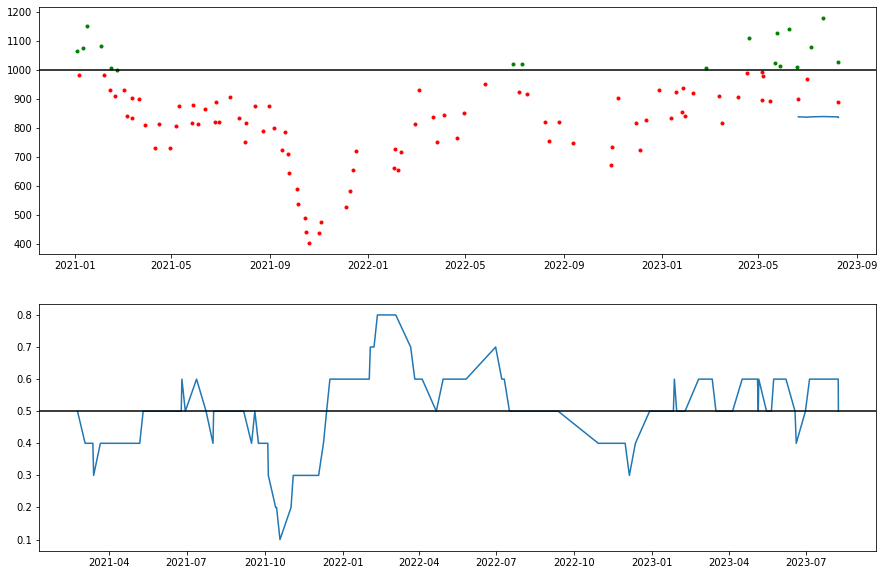

In [56]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].scatter(pf.trade_ts[pf.trade_ts['balance'] >= start_cash]['close_date'],
            pf.trade_ts[pf.trade_ts['balance'] >= start_cash]['balance'], c='g', marker='.')
ax[0].scatter(pf.trade_ts[pf.trade_ts['balance'] < start_cash]['close_date'],
            pf.trade_ts[pf.trade_ts['balance'] < start_cash]['balance'], c='r', marker='.')
ax[0].plot(pf.trade_ts['close_date'], pf.trade_ts['balance'].rolling(100).mean())
ax[0].axhline(start_cash, c='k')
ax[1].plot(pf.trade_ts['close_date'], pf.trade_ts['result'].map(lambda x: 0 if x == 'lose' else 1).rolling(10).mean())
ax[1].axhline(0.5, c='k')
plt.show()

In [63]:
%%time
# Trigger: 1 candle close within range - Exapnd the code for multiple candle close condition
# Deviation: If on the 1-minute chart price closes outside the range and then closes inside again

start_cash = 1000
risk = 0.01
sl_atr_ratio = 2
min_rr = 1.5
pf = Portfolio(start_cash=start_cash, max_pos_pct=0.1, max_leverage=100, maker_fee=0.0002, taker_fee=0.00055)

atr = data.ta.atr()
rsi = data.ta.rsi()

for day in range(days):
    print(f'{day = }')
        
    date_vp = start_date + datetime.timedelta(days=day)
    date_trade = date_vp + datetime.timedelta(days=2)
    
    data_vp = data.loc[date_vp + datetime.timedelta(minutes=1):date_vp + datetime.timedelta(minutes=2*1440)]
    va_high = data_vp['high'].max()
    va_low = data_vp['low'].min()
    poc = (va_high + va_low) / 2    
    
    data_trade = data.loc[date_trade + datetime.timedelta(minutes=1):date_trade + datetime.timedelta(minutes=1440)].copy()
    
    data_trade['dev_high'] = data_trade['close'] > va_high
    data_trade['dev_low'] = data_trade['close'] < va_low
    
    dev_high_start, dev_high_end, dev_low_start, dev_low_end = None, None, None, None
    for idx, val in data_trade.iterrows():
        if pf.trade.loc[0, 'position'] == 'flat' and not dev_high_start and val['dev_high']:
            dev_high_start = idx
        if pf.trade.loc[0, 'position'] == 'flat' and not dev_low_start and val['dev_low']:
            dev_low_start = idx

        if pf.trade.loc[0, 'position'] == 'flat' and dev_high_start and not val['dev_high']:
#             if pf.trade_ts.shape[0] >=10:
#                 result_ma = pf.trade_ts['result'].map(lambda x: 0 if x == 'lose' else 1).rolling(10).mean().iloc[-1]
#                 risk = 0.01 if result_ma > 0.5 else 0
            dev_high_end = idx
            entry = data_trade.loc[idx]['close']
            sl = data_trade.loc[dev_high_start:dev_high_end]['high'].max()
#             sl = data_trade.loc[dev_high_start:dev_high_end]['high'].max() + sl_atr_ratio * atr.loc[idx]
            tp = poc
            rr = np.abs((entry - tp) / (sl - entry))
            if rr > min_rr:
                pf.open_trade(entry, sl, tp, date=idx, risk=risk)
            dev_high_start, dev_high_end = None, None
        elif pf.trade.loc[0, 'position'] == 'flat' and dev_low_start and not val['dev_low']:
#             if pf.trade_ts.shape[0] >=10:
#                 result_ma = pf.trade_ts['result'].map(lambda x: 0 if x == 'lose' else 1).rolling(10).mean().iloc[-1]
#                 risk = 0.01 if result_ma > 0.5 else 0
            dev_low_end = idx
            entry = data_trade.loc[idx]['close']
            sl = data_trade.loc[dev_low_start:dev_low_end]['low'].min()
#             sl = data_trade.loc[dev_low_start:dev_low_end]['low'].min() - sl_atr_ratio * atr.loc[idx]
            tp = poc
            rr = np.abs((entry - tp) / (sl - entry))
            if rr > min_rr:
                pf.open_trade(entry, sl, tp, date=idx, risk=risk)
            dev_low_start, dev_low_end = None, None
        elif pf.trade.loc[0, 'position'] == 'short' and data_trade.loc[idx]['low'] <= (tp + atr.loc[idx]):
#         elif pf.trade.loc[0, 'position'] == 'short' and data_trade.loc[idx]['low'] <= tp:
            tp += atr.loc[idx]
            pf.take_profit(tp, date=idx)
        elif pf.trade.loc[0, 'position'] == 'short' and data_trade.loc[idx]['high'] >= (sl + sl_atr_ratio * atr.loc[idx]):
#         elif pf.trade.loc[0, 'position'] == 'short' and data_trade.loc[idx]['high'] >= sl:
            sl += sl_atr_ratio * atr.loc[idx]
            pf.stop_loss(sl, date=idx)
        elif pf.trade.loc[0, 'position'] == 'long' and data_trade.loc[idx]['high'] >= (tp - atr.loc[idx]):
#         elif pf.trade.loc[0, 'position'] == 'long' and data_trade.loc[idx]['high'] >= tp:
            tp -= atr.loc[idx]
            pf.take_profit(tp, date=idx)
        elif pf.trade.loc[0, 'position'] == 'long' and data_trade.loc[idx]['low'] <= (sl - sl_atr_ratio * atr.loc[idx]):
#         elif pf.trade.loc[0, 'position'] == 'long' and data_trade.loc[idx]['low'] <= sl:
            sl -= sl_atr_ratio * atr.loc[idx]
            pf.stop_loss(sl, date=idx)

day = 0
day = 1
day = 2
day = 3
day = 4
day = 5
day = 6
day = 7
day = 8
day = 9
day = 10
day = 11
day = 12
day = 13
day = 14
day = 15
day = 16
day = 17
day = 18
day = 19
day = 20
day = 21
day = 22
day = 23
day = 24
day = 25
day = 26
day = 27
day = 28
day = 29
day = 30
day = 31
day = 32
day = 33
day = 34
day = 35
day = 36
day = 37
day = 38
day = 39
day = 40
day = 41
day = 42
day = 43
day = 44
day = 45
day = 46
day = 47
day = 48
day = 49
day = 50
day = 51
day = 52
day = 53
day = 54
day = 55
day = 56
day = 57
day = 58
day = 59
day = 60
day = 61
day = 62
day = 63
day = 64
day = 65
day = 66
day = 67
day = 68
day = 69
day = 70
day = 71
day = 72
day = 73
day = 74
day = 75
day = 76
day = 77
day = 78
day = 79
day = 80
day = 81
day = 82
day = 83
day = 84
day = 85
day = 86
day = 87
day = 88
day = 89
day = 90
day = 91
day = 92
day = 93
day = 94
day = 95
day = 96
day = 97
day = 98
day = 99
day = 100
day = 101
day = 102
day = 103
day = 104
day = 105
day = 106
day = 107
day = 108
day = 109
day = 110


day = 832
day = 833
day = 834
day = 835
day = 836
day = 837
day = 838
day = 839
day = 840
day = 841
day = 842
day = 843
day = 844
day = 845
day = 846
day = 847
day = 848
day = 849
day = 850
day = 851
day = 852
day = 853
day = 854
day = 855
day = 856
day = 857
day = 858
day = 859
day = 860
day = 861
day = 862
day = 863
day = 864
day = 865
day = 866
day = 867
day = 868
day = 869
day = 870
day = 871
day = 872
day = 873
day = 874
day = 875
day = 876
day = 877
day = 878
day = 879
day = 880
day = 881
day = 882
day = 883
day = 884
day = 885
day = 886
day = 887
day = 888
day = 889
day = 890
day = 891
day = 892
day = 893
day = 894
day = 895
day = 896
day = 897
day = 898
day = 899
day = 900
day = 901
day = 902
day = 903
day = 904
day = 905
day = 906
day = 907
day = 908
day = 909
day = 910
day = 911
day = 912
day = 913
day = 914
day = 915
day = 916
day = 917
day = 918
day = 919
day = 920
day = 921
day = 922
day = 923
day = 924
day = 925
day = 926
day = 927
day = 928
day = 929
day = 930
day = 931


In [64]:
# %%time
# # Trigger: 1 candle close within range - Exapnd the code for multiple candle close condition
# # Deviation: If on the 1-minute chart price closes outside the range and then closes inside again

# start_cash = 1000
# risk = 0.01
# sl_atr_ratio = 2
# min_rr = 1.5
# pf = Portfolio(start_cash=start_cash, max_pos_pct=0.1, max_leverage=100, maker_fee=0.0002, taker_fee=0.00055)

# atr = data.ta.atr()
# rsi = data.ta.rsi()

# for day in range(days):
#     print(f'{day = }')
        
#     date_vp = start_date + datetime.timedelta(days=day)
#     date_trade = date_vp + datetime.timedelta(days=2)
    
#     data_vp = data.loc[date_vp + datetime.timedelta(minutes=1):date_vp + datetime.timedelta(minutes=2*1440)]
#     vp = volume_profile(data_vp, n_bins=50)
#     poc, va_high, va_low = get_poc_va(vp, va_ratio=0.95)
    
#     data_trade = data.loc[date_trade + datetime.timedelta(minutes=1):date_trade + datetime.timedelta(minutes=1440)].copy()
    
#     data_trade['dev_high'] = data_trade['close'] > va_high
#     data_trade['dev_low'] = data_trade['close'] < va_low
    
#     dev_high_start, dev_high_end, dev_low_start, dev_low_end = None, None, None, None
#     for idx, val in data_trade.iterrows():
#         if pf.trade.loc[0, 'position'] == 'flat' and not dev_high_start and val['dev_high']:
#             dev_high_start = idx
#         if pf.trade.loc[0, 'position'] == 'flat' and not dev_low_start and val['dev_low']:
#             dev_low_start = idx

#         if pf.trade.loc[0, 'position'] == 'flat' and dev_high_start and not val['dev_high']:
# #             if pf.trade_ts.shape[0] >=10:
# #                 result_ma = pf.trade_ts['result'].map(lambda x: 0 if x == 'lose' else 1).rolling(10).mean().iloc[-1]
# #                 risk = 0.01 if result_ma > 0.5 else 0
#             dev_high_end = idx
#             entry = data_trade.loc[idx]['close']
#             sl = data_trade.loc[dev_high_start:dev_high_end]['high'].max()
# #             sl = data_trade.loc[dev_high_start:dev_high_end]['high'].max() + sl_atr_ratio * atr.loc[idx]
#             tp = poc
#             rr = np.abs((entry - tp) / (sl - entry))
#             if rr > min_rr:
#                 pf.open_trade(entry, sl, tp, date=idx, risk=risk)
#             dev_high_start, dev_high_end = None, None
#         elif pf.trade.loc[0, 'position'] == 'flat' and dev_low_start and not val['dev_low']:
# #             if pf.trade_ts.shape[0] >=10:
# #                 result_ma = pf.trade_ts['result'].map(lambda x: 0 if x == 'lose' else 1).rolling(10).mean().iloc[-1]
# #                 risk = 0.01 if result_ma > 0.5 else 0
#             dev_low_end = idx
#             entry = data_trade.loc[idx]['close']
#             sl = data_trade.loc[dev_low_start:dev_low_end]['low'].min()
# #             sl = data_trade.loc[dev_low_start:dev_low_end]['low'].min() - sl_atr_ratio * atr.loc[idx]
#             tp = poc
#             rr = np.abs((entry - tp) / (sl - entry))
#             if rr > min_rr:
#                 pf.open_trade(entry, sl, tp, date=idx, risk=risk)
#             dev_low_start, dev_low_end = None, None
#         elif pf.trade.loc[0, 'position'] == 'short' and data_trade.loc[idx]['low'] <= (tp + atr.loc[idx]):
# #         elif pf.trade.loc[0, 'position'] == 'short' and data_trade.loc[idx]['low'] <= tp:
#             tp += atr.loc[idx]
#             pf.take_profit(tp, date=idx)
#         elif pf.trade.loc[0, 'position'] == 'short' and data_trade.loc[idx]['high'] >= (sl + sl_atr_ratio * atr.loc[idx]):
# #         elif pf.trade.loc[0, 'position'] == 'short' and data_trade.loc[idx]['high'] >= sl:
#             sl += sl_atr_ratio * atr.loc[idx]
#             pf.stop_loss(sl, date=idx)
#         elif pf.trade.loc[0, 'position'] == 'long' and data_trade.loc[idx]['high'] >= (tp - atr.loc[idx]):
# #         elif pf.trade.loc[0, 'position'] == 'long' and data_trade.loc[idx]['high'] >= tp:
#             tp -= atr.loc[idx]
#             pf.take_profit(tp, date=idx)
#         elif pf.trade.loc[0, 'position'] == 'long' and data_trade.loc[idx]['low'] <= (sl - sl_atr_ratio * atr.loc[idx]):
# #         elif pf.trade.loc[0, 'position'] == 'long' and data_trade.loc[idx]['low'] <= sl:
#             sl -= sl_atr_ratio * atr.loc[idx]
#             pf.stop_loss(sl, date=idx)

In [65]:
pf.trade_ts['rr'] = np.abs((pf.trade_ts['entry'] - pf.trade_ts['tp']) / (pf.trade_ts['entry'] - pf.trade_ts['sl']))

In [66]:
hitrate = pf.trade_ts[pf.trade_ts['result'] == 'win'].shape[0] / pf.trade_ts.shape[0]
hitrate

0.48868778280542985

In [67]:
pf.trade_ts['rr'].min(), pf.trade_ts['rr'].max(), pf.trade_ts['rr'].mean()

(0.47262412283419636, 23.439224035142615, 2.7546757666894086)

In [68]:
pf.trade_ts

,position,size,open_date,close_date,entry,sl,tp,result,balance,rr
0,short,500.0,2021-01-03 16:45:00,2021-01-04 09:35:00,33240.56,33822.69,31266.072446,win,1029.324974,3.391833
1,short,205.864995,2021-01-06 08:30:00,2021-01-06 23:45:00,34179.69,36677.070902,31245.0,lose,1014.056745,1.175107
2,short,912.65107,2021-01-07 01:15:00,2021-01-07 12:05:00,36909.65,38046.777489,33419.605,lose,984.935504,3.069177
3,short,196.987101,2021-01-08 15:35:00,2021-01-10 20:00:00,39978.72,41950.0,37167.139856,win,998.641259,1.426271
4,long,299.592378,2021-01-10 20:45:00,2021-01-10 22:15:00,37372.35,36300.0,38802.135926,win,1009.878326,1.33332
...,...,...,...,...,...,...,...,...,...,...
437,long,4501.683261,2023-08-22 20:05:00,2023-08-22 21:30:00,25814.7,25492.868904,26055.5,lose,653.478696,0.748219
438,long,3659.480697,2023-08-22 23:10:00,2023-08-22 23:15:00,25830.1,25784.69,25990.099216,win,673.401982,3.523436
439,long,5723.916849,2023-08-28 05:55:00,2023-08-28 12:10:00,25967.78,25937.33,26054.194171,win,688.156785,2.837904
440,short,6262.226742,2023-08-28 17:20:00,2023-08-28 19:20:00,26160.01,26188.64,26095.088099,win,699.001227,2.267618


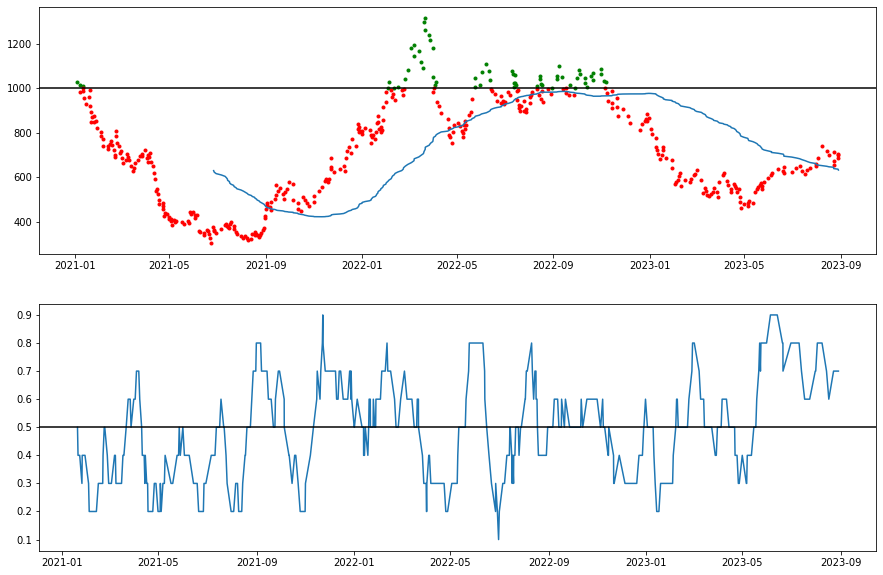

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].scatter(pf.trade_ts[pf.trade_ts['balance'] >= start_cash]['close_date'],
            pf.trade_ts[pf.trade_ts['balance'] >= start_cash]['balance'], c='g', marker='.')
ax[0].scatter(pf.trade_ts[pf.trade_ts['balance'] < start_cash]['close_date'],
            pf.trade_ts[pf.trade_ts['balance'] < start_cash]['balance'], c='r', marker='.')
ax[0].plot(pf.trade_ts['close_date'], pf.trade_ts['balance'].rolling(100).mean())
ax[0].axhline(start_cash, c='k')
ax[1].plot(pf.trade_ts['close_date'], pf.trade_ts['result'].map(lambda x: 0 if x == 'lose' else 1).rolling(10).mean())
ax[1].axhline(0.5, c='k')
plt.show()

In [21]:
# plt.figure(figsize=(10, 7))
# plt.hist(pf.trade_ts['rr'], bins=50)
# plt.show()

In [22]:
# plt.figure(figsize=(10, 7))
# plt.hist(pf.trade_ts[pf.trade_ts['result'] == 'win']['rr'], bins=50)
# plt.show()

In [23]:
# plt.figure(figsize=(10, 7))
# plt.hist(pf.trade_ts[pf.trade_ts['result'] == 'lose']['rr'], bins=50)
# plt.show()

In [ ]:
# date_trade = '2023-01-05'
# date_vp = (parse(date_trade) - datetime.timedelta(days=1)).strftime('%Y-%m-%d')

# data_vp = Dataset().get_day_data(interval='1m', date=date_vp)
# vp = volume_profile(data_vp, n_bins=50)
# poc, va_high, va_low = get_poc_va(vp, va_ratio=0.95)

In [ ]:
# plot_volume_profile(vp, poc=poc, va_high=va_high, va_low=va_low)

In [ ]:
# data_trade = Dataset().get_day_data(interval='15m', date=date_trade)
# atr = data_trade.ta.atr().fillna(0) / 2

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# mpf.plot(data_trade, type='candle', volume=False, ax=ax)
# ax.fill_between(np.arange(data_trade.shape[0]), va_high + atr, va_high - atr, color='blue', alpha=0.3)
# ax.fill_between(np.arange(data_trade.shape[0]), va_low + atr, va_low - atr, color='blue', alpha=0.3)
# ax.fill_between(np.arange(data_trade.shape[0]), poc + atr, poc - atr, color='red', alpha=0.3)
# ax.axhline(va_high, c='blue')
# ax.axhline(va_low, c='blue')
# ax.axhline(poc, c='red')
# fig.show()